In [2]:
import numpy as np
from scipy.io import wavfile
import IPython.display as ipd
import matplotlib.pyplot as plt

Play Audio

In [3]:
filename = "C:/Users/Hairul Lana/Downloads/tes.wav"
ipd.Audio(filename)

Get Audio Information

In [4]:
sample_rate, samples = wavfile.read(filename)
print("Sample rate: {0} Hz".format(sample_rate))
print("Samples : {0}".format(len(samples)))
print("Audio duration: {0} second".format(len(samples) / sample_rate))

Sample rate: 44100 Hz
Samples : 182427
Audio duration: 4.136666666666667 second


In [5]:
import librosa
import librosa.feature

audio,_ = librosa.load(filename, sample_rate)
windowLength = int(0.02*sample_rate)
frameLength = int(0.01*sample_rate)
mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13, n_fft=windowLength, hop_length=frameLength)
mfcc_flat = np.mean(mfcc, axis=1)
print(mfcc_flat)

[-320.5566      108.379074     -7.128017     11.543436      4.8192353
   -1.8172773     2.7843208     5.8902035     2.0904129     4.635191
    3.8929033     1.3804461    -0.86693376]


C:\Users\HAIRUL~1\AppData\Local\Temp/ipykernel_11064/822659908.py:4: FutureWarning: Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  audio,_ = librosa.load(filename, sample_rate)


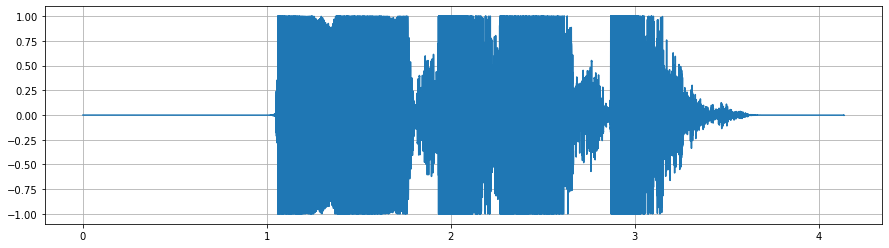

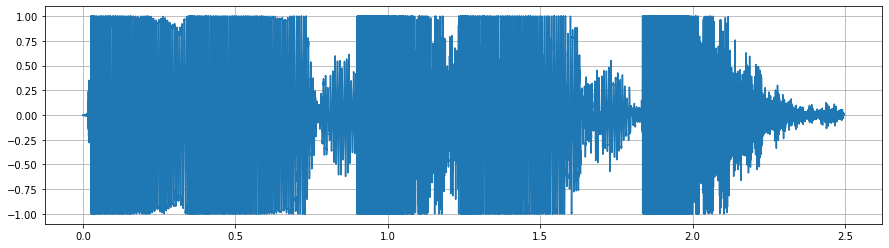

In [6]:
plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio)
plt.grid(True)

audioTrim,_ = librosa.effects.trim(audio, top_db=30)

plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(audioTrim) / sample_rate, num=len(audioTrim)), audioTrim)
plt.grid(True)

In [17]:
onsetDetection = librosa.onset.onset_detect(audioTrim, sr=sample_rate, units='time')
print(onsetDetection)
# onsetDetection = onsetDetection.tolist()

while len(onsetDetection) > 5 :
  onsetDetection = np.delete(onsetDetection, 0)
print(onsetDetection)

[0.03482993 0.3599093  0.48761905 0.90557823 1.24226757 1.84598639]
[0.3599093  0.48761905 0.90557823 1.24226757 1.84598639]


C:\Users\HAIRUL~1\AppData\Local\Temp/ipykernel_11064/1944639435.py:1: FutureWarning: Pass y=[-8.3923340e-04 -1.2207031e-04 -7.6293945e-05 ...  1.4175415e-02
  1.5426636e-02  1.6998291e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onsetDetection = librosa.onset.onset_detect(audioTrim, sr=sample_rate, units='time')


Cut Audio

In [ ]:
from pydub import AudioSegment

newAudio = AudioSegment.from_wav(filename)
newAudio = newAudio[1000:2000]
# newAudio.export('newSong.wav', format="wav")

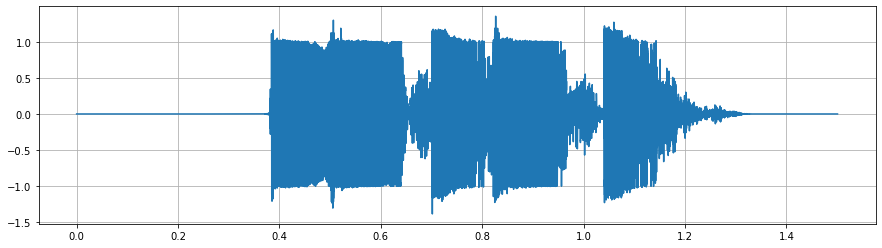

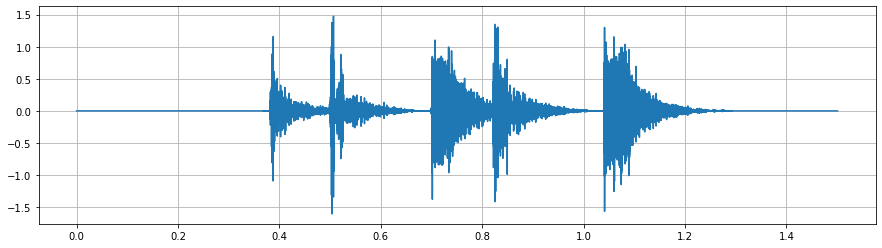

In [ ]:
import librosa.display
from scipy import signal
from IPython.display import Audio, IFrame, display

audio,sr = librosa.load(filename, mono=True, sr=16000, offset=0, duration=10)

def f_high(y,sr):
  b,a = signal.butter(10, 2000/(sr/2), btype='highpass')
  yf = signal.lfilter(b,a,y)
  return yf

plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio)
plt.grid(True)

audio = f_high(audio, sr)

plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio)
plt.grid(True)

# display(Audio(audio,rate=sr))
# audio.export('file.wav', format="wav")